In [1]:
import librosa
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa.display


In [2]:
SAVED_MODEL_PATH = "model.h5"
SAMPLES_TO_CONSIDER = 22050

In [3]:
model = tf.keras.models.load_model(SAVED_MODEL_PATH)
mapping =  [
        "down",
        "go",
        "left",
        "no",
        "off",
        "on",
        "right",
        "stop",
        "up",
        "yes"
    ]

In [5]:
def preprocess(file_path, num_mfcc=13, n_fft=2048, hop_length=512):
    """Extract MFCCs from audio file.
    :param file_path (str): Path of audio file
    :param num_mfcc (int): # of coefficients to extract
    :param n_fft (int): Interval we consider to apply STFT. Measured in # of samples
    :param hop_length (int): Sliding window for STFT. Measured in # of samples
    :return MFCCs (ndarray): 2-dim array with MFCC data of shape (# time steps, # coefficients)
    """
    # load audio file
    signal, sample_rate = librosa.load(file_path)

    signal, sample_rate = librosa.load(file_path)

    if len(signal) >= SAMPLES_TO_CONSIDER:
            # ensure consistency of the length of the signal
        signal = signal[:SAMPLES_TO_CONSIDER]

            # extract MFCCs
        MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        plt.plot()
        img = librosa.display.specshow(MFCCs)
        plt.xlabel("Time",fontsize='13')
        plt.title("MFCCs")
    return MFCCs.T

In [6]:
def predict( file_path):
    """
    :param file_path (str): Path to audio file to predict
    :return predicted_keyword (str): Keyword predicted by the model
    """

    # extract MFCC
    MFCCs = preprocess(file_path)

    # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
    MFCCs = MFCCs[np.newaxis, ..., np.newaxis]
    # get the predicted label
    predictions = model.predict(MFCCs)
    predicted_index = np.argmax(predictions)
    predicted_keyword = mapping[predicted_index]
    return predicted_keyword

In [7]:
filename = "./test/0b40aa8e_nohash_0.wav"
filename2 = "test/left.wav"

C:\Users\youne\AppData\Local\Temp\ipykernel_13992\3049193327.py:19: FutureWarning: Pass y=[ 1.4537673e-04  1.6131745e-04  1.6143863e-04 ... -5.8839792e-05
 -1.6382284e-04 -1.7671520e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,


The word in the audio file is left


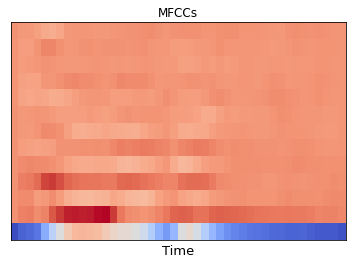

In [8]:
keyword = predict(filename2)
print(f"The word in the audio file is {keyword}")